In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Generating Bangla Captions Using Transfer Learning



---



---







#  Applied Image Processing Techniques:





In [2]:
import os
import pickle
import numpy as np  
import pandas as pd  
import cv2

In [5]:
images_path = '/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/'
from glob import glob
images = glob(images_path+'*.jpg')
len(images)
for i in images:
 print(i)

/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1501001.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1501002.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1501003.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1501004.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1501005.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1502001.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1502002.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1502003.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1502004.jpg
/content/drive/MyDrive/Bangla Image Caption.zip (Unzipp

# Color Conversion

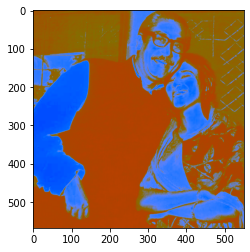

In [28]:
import matplotlib.pyplot as plt

for i in range(1):
    plt.figure()
    img = cv2.imread(images[i-25])
    img = cv2.cvtColor(img, cv2.COLOR_LAB2BGR)#convert RGB/BGR to CIE Lab, color conversions
    plt.imshow(img)

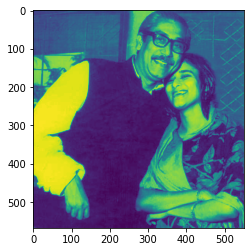

In [53]:
import matplotlib.pyplot as plt

for i in range(1):
    plt.figure()
    img = cv2.imread(images[i-25])
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)# convert it to gray scales
    plt.imshow(img)

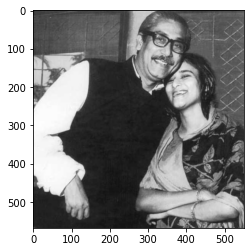

In [56]:
import matplotlib.pyplot as plt

for i in range(1):
    plt.figure()
    img = cv2.imread(images[i-25])
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)#remove channel from the image
    plt.imshow(img)

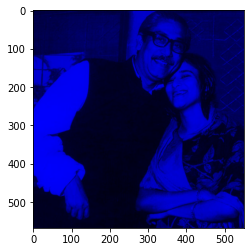

In [60]:
import matplotlib.pyplot as plt

for i in range(1):
    plt.figure()
    img = cv2.imread(images[i-25])
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)#convert RGB/BGR to HSV (hue saturation value) with H range 0..180 if 8 bit image, color conversions


    

    plt.imshow(img1)

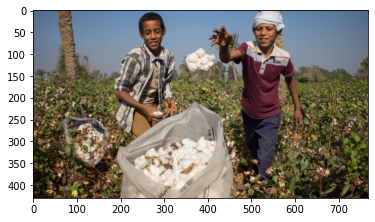

In [64]:
import matplotlib.pyplot as plt

for i in range(1):
    plt.figure()
    img = cv2.imread(images[i-52])
   
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA )#convert between RGB and BGR color spaces (with or without alpha channel)

    plt.imshow(img2)

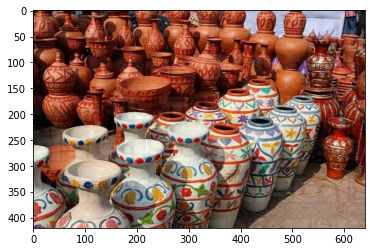

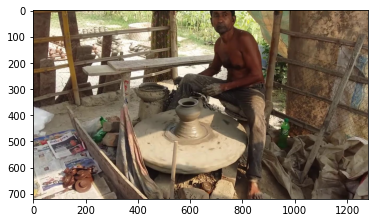

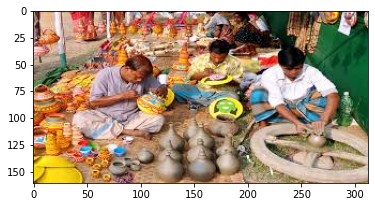

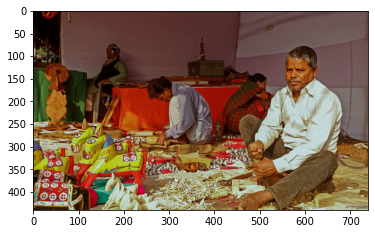

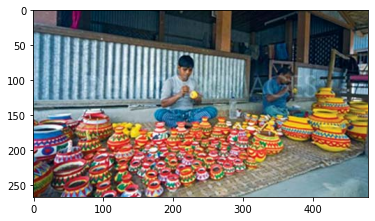

In [35]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i-100])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
    plt.imshow(img)

In [42]:
import cv2
import numpy as np
import math

# read image
img = cv2.imread('/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1599014.jpg')

# METHOD 1: RGB

# convert img to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# compute gamma = log(mid*255)/log(mean)
mid = 0.5
mean = np.mean(gray)
gamma = math.log(mid*255)/math.log(mean)
print(gamma)

# do gamma correction
img_gamma1 = np.power(img, gamma).clip(0,255).astype(np.uint8)



# METHOD 2: HSV (or other color spaces)

# convert img to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue, sat, val = cv2.split(hsv)

# compute gamma = log(mid*255)/log(mean)
mid = 0.5
mean = np.mean(val)
gamma = math.log(mid*255)/math.log(mean)
print(gamma)

# do gamma correction on value channel
val_gamma = np.power(val, gamma).clip(0,255).astype(np.uint8)

# combine new value channel with original hue and sat channels
hsv_gamma = cv2.merge([hue, sat, val_gamma])
img_gamma2 = cv2.cvtColor(hsv_gamma, cv2.COLOR_HSV2BGR)

# show results
#cv2.imshow('input', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

# save results
cv2.imwrite('lioncuddle1_gamma1.jpg', img_gamma1)
cv2.imwrite('lioncuddle1_gamma2.jpg', img_gamma2)

0.9445882975503169
0.9215592493223789


True

## Image restoration
- Image reconstruction
    - Fixing damaged images
    - Text removing
    - Logo removing
    - Object removing
- Inpainting
    - Reconstructing lost parts of images
    - Looking at the non-damaged regions

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 8)

In [7]:
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

In [9]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

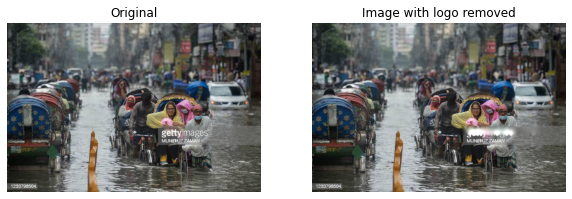

In [32]:
 image_with_logo = plt.imread('/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/fm dataset/logo1.jpg')

# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[250:272, 360:550] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                                mask,
                                                multichannel=True)

# Show the original and logo removed images
plot_comparison(image_with_logo, image_logo_removed, 'Image with logo removed')

# Reduction of noise

We have a noisy image that we want to improve by removing the noise in it.

Use total variation filter denoising to accomplish this.

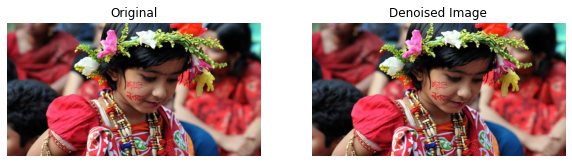

In [33]:
from skimage.restoration import denoise_bilateral

landscape_image = plt.imread('/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/1502004.jpg')

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image, multichannel=True)

# Show original and resulting images
plot_comparison(landscape_image, denoised_image, 'Denoised Image')

# Resize (220,220)

In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

# defining global variable path
image_path = "/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/"



In [41]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Preprocessing
def processing(data):
    # loading image
    # Getting 3 images to work with 
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in image_path[:3]]
    print('Original size',img[0].shape)
    # --------------------------------
    # setting dim of the resize
    height = 220
    width = 220
    dim = (width, height)
    res_img = ['/content/drive/MyDrive/Bangla Image Caption.zip (Unzipped Files)/Bangla Image Caption/Images/']
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)

    # Checcking the size
    print("RESIZED", res_img[1].shape)
    
    # Visualizing one of the images in the array
    original = res_img[1]
    display_one(original)